In [2]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_pil_image
from torchvision.io import read_image
from torchvision import transforms
from PIL import Image
from collections import Counter

import os
import sys
import json
import random as rnd

1. Transfer learning models comparison (Feature Extraction & Full Fine Tuning)

In [3]:
METRICS_PATH = "../results"

fe_efficientnet_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_feature_extraction(22-11_15-50).json")
fe_resnet_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_feature_extraction(22-11_15-40).json")
fe_efficientnet_epoch = list(range(len(fe_efficientnet_metrics_df)))
fe_resnet_epoch = list(range(len(fe_resnet_metrics_df)))

ft_efficientnet_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_16-06).json")
ft_resnet_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_fine_tuning(22-11_16-01).json")
ft_efficientnet_epoch = list(range(len(ft_efficientnet_metrics_df)))
ft_resnet_epoch = list(range(len(ft_resnet_metrics_df)))

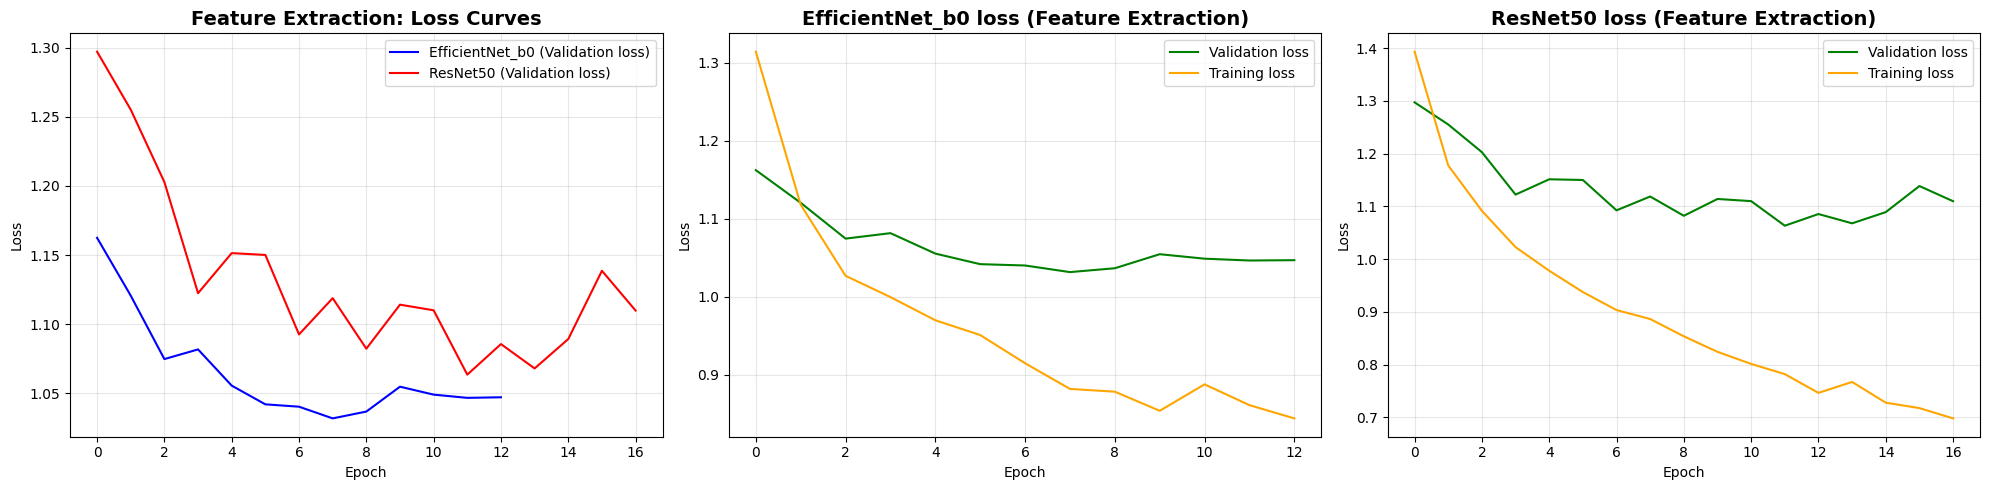

In [4]:
# feature extraction
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.lineplot(ax=axes[0], x=fe_efficientnet_epoch, y=fe_efficientnet_metrics_df["val_loss"], label="EfficientNet_b0 (Validation loss)", color="blue")
sns.lineplot(ax=axes[0], x=fe_resnet_epoch, y=fe_resnet_metrics_df["val_loss"], label="ResNet50 (Validation loss)", color="red")
axes[0].set_title("Feature Extraction: Loss Curves", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

sns.lineplot(ax=axes[1], x=fe_efficientnet_epoch, y=fe_efficientnet_metrics_df["val_loss"], label="Validation loss", color="green")
sns.lineplot(ax=axes[1], x=fe_efficientnet_epoch, y=fe_efficientnet_metrics_df["train_loss"], label="Training loss", color="orange")
axes[1].set_title("EfficientNet_b0 loss (Feature Extraction)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

sns.lineplot(ax=axes[2], x=fe_resnet_epoch, y=fe_resnet_metrics_df["val_loss"], label="Validation loss", color="green")
sns.lineplot(ax=axes[2], x=fe_resnet_epoch, y=fe_resnet_metrics_df["train_loss"], label="Training loss", color="orange")
axes[2].set_title("ResNet50 loss (Feature Extraction)", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Loss")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

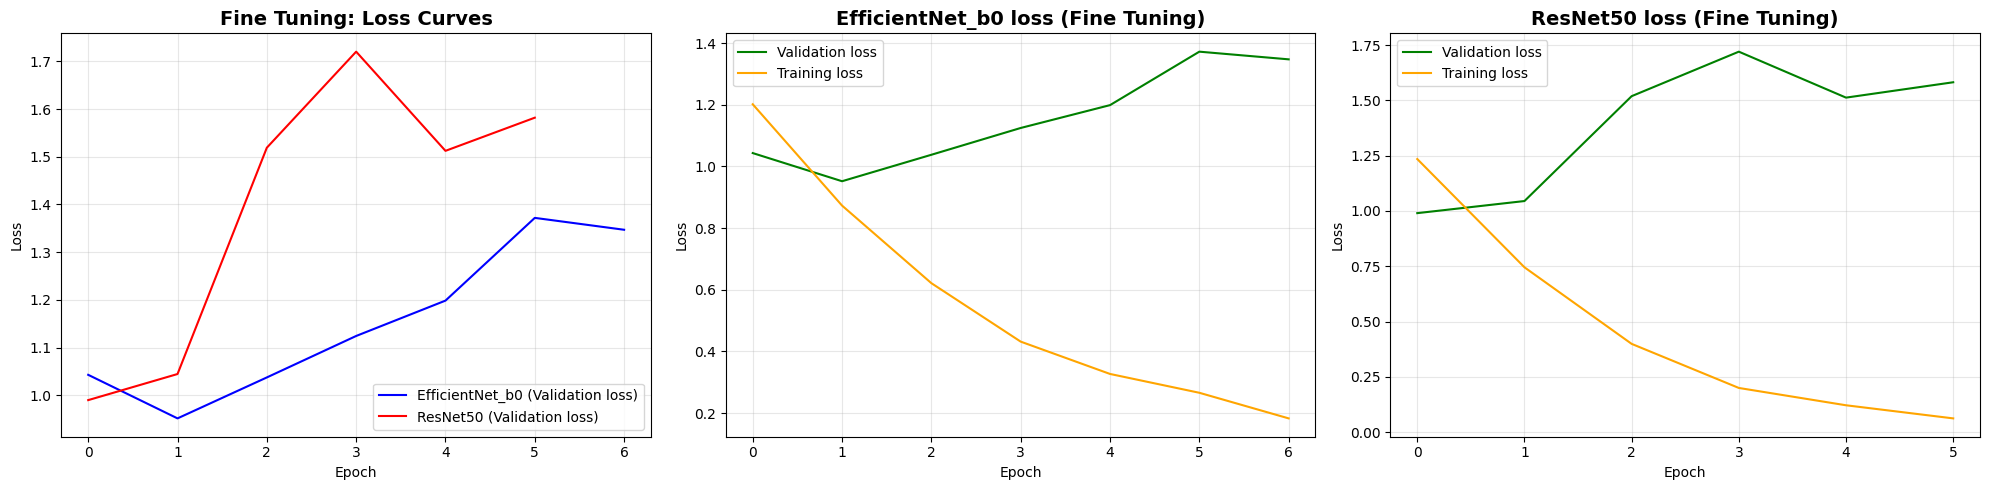

In [5]:
# fine tuning
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.lineplot(ax=axes[0], x=ft_efficientnet_epoch, y=ft_efficientnet_metrics_df["val_loss"], label="EfficientNet_b0 (Validation loss)", color="blue")
sns.lineplot(ax=axes[0], x=ft_resnet_epoch, y=ft_resnet_metrics_df["val_loss"], label="ResNet50 (Validation loss)", color="red")
axes[0].set_title("Fine Tuning: Loss Curves", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

sns.lineplot(ax=axes[1], x=ft_efficientnet_epoch, y=ft_efficientnet_metrics_df["val_loss"], label="Validation loss", color="green")
sns.lineplot(ax=axes[1], x=ft_efficientnet_epoch, y=ft_efficientnet_metrics_df["train_loss"], label="Training loss", color="orange")
axes[1].set_title("EfficientNet_b0 loss (Fine Tuning)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

sns.lineplot(ax=axes[2], x=ft_resnet_epoch, y=ft_resnet_metrics_df["val_loss"], label="Validation loss", color="green")
sns.lineplot(ax=axes[2], x=ft_resnet_epoch, y=ft_resnet_metrics_df["train_loss"], label="Training loss", color="orange")
axes[2].set_title("ResNet50 loss (Fine Tuning)", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Loss")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. Learning rates comparison

In [6]:
low_backbone_lr_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_16-28).json")
low_backbone_lr_epoch = list(range(len(low_backbone_lr_metrics_df)))

low_both_lr_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_16-50).json")
low_both_lr_epoch = list(range(len(low_both_lr_metrics_df)))

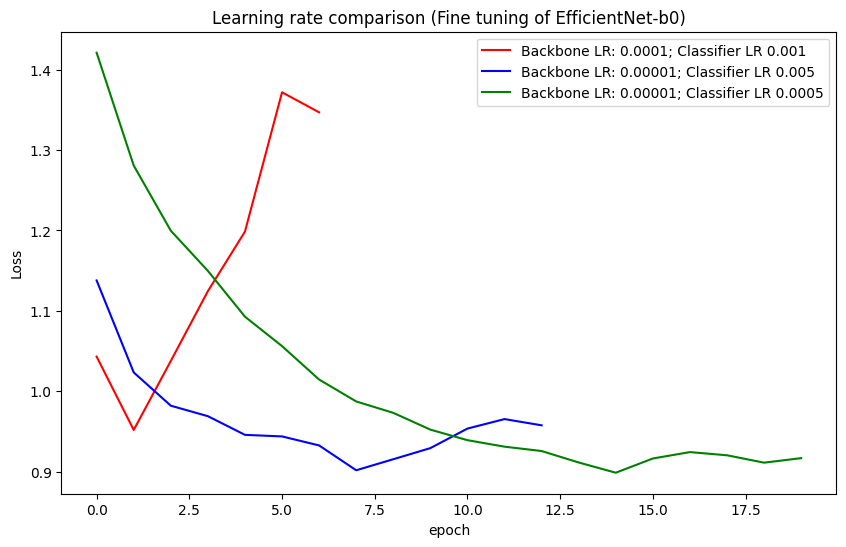

In [7]:
# loss visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(x=ft_efficientnet_epoch, y=ft_efficientnet_metrics_df["val_loss"], label="Backbone LR: 0.0001; Classifier LR 0.001", color="red")
sns.lineplot(x=low_backbone_lr_epoch, y=low_backbone_lr_metrics_df["val_loss"], label="Backbone LR: 0.00001; Classifier LR 0.005", color="blue")
sns.lineplot(x=low_both_lr_epoch, y=low_both_lr_metrics_df["val_loss"], label="Backbone LR: 0.00001; Classifier LR 0.0005", color="green")

plt.title("Learning rate comparison (Fine tuning of EfficientNet-b0)")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

3. Freeze strategies

In [8]:
freeze2_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_best.json")
freeze2_epoch = list(range(len(freeze2_metrics_df)))

freeze5_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_19-16).json")
freeze5_epoch = list(range(len(freeze5_metrics_df)))

freeze3_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_19-25).json")
freeze3_epoch = list(range(len(freeze3_metrics_df)))

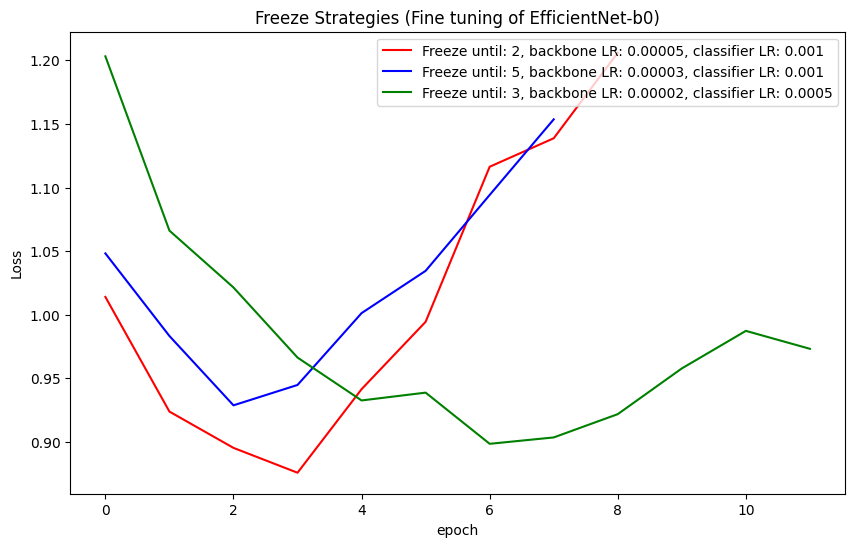

In [9]:
# loss visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(x=freeze2_epoch, y=freeze2_metrics_df["val_loss"], label="Freeze until: 2, backbone LR: 0.00005, classifier LR: 0.001", color="red")
sns.lineplot(x=freeze5_epoch, y=freeze5_metrics_df["val_loss"], label="Freeze until: 5, backbone LR: 0.00003, classifier LR: 0.001", color="blue")
sns.lineplot(x=freeze3_epoch, y=freeze3_metrics_df["val_loss"], label="Freeze until: 3, backbone LR: 0.00002, classifier LR: 0.0005", color="green")

plt.title("Freeze Strategies (Fine tuning of EfficientNet-b0)")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

4. evaluating the best model

In [10]:
best_metrics_df = freeze2_metrics_df
epochs = freeze2_epoch

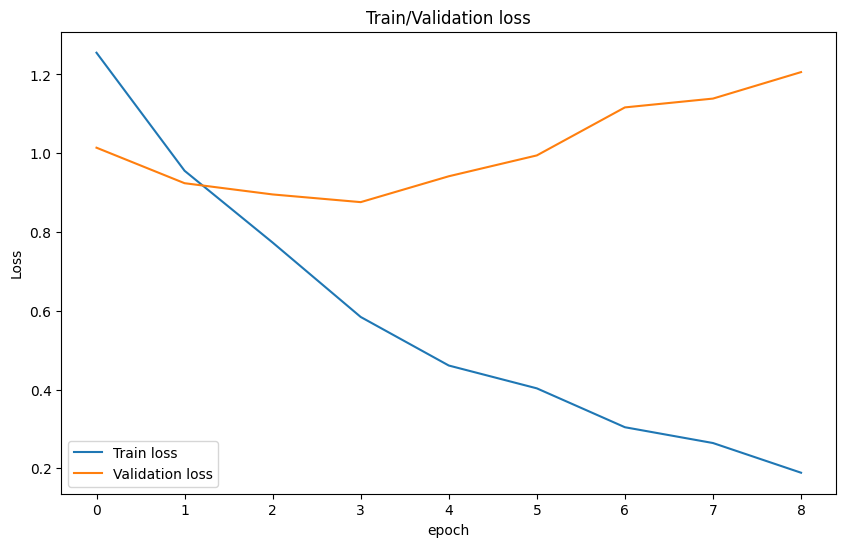

In [11]:
# loss visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=best_metrics_df["train_loss"], label="Train loss")
sns.lineplot(x=epochs, y=best_metrics_df["val_loss"], label="Validation loss")

plt.xticks(epochs)
plt.title("Train/Validation loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

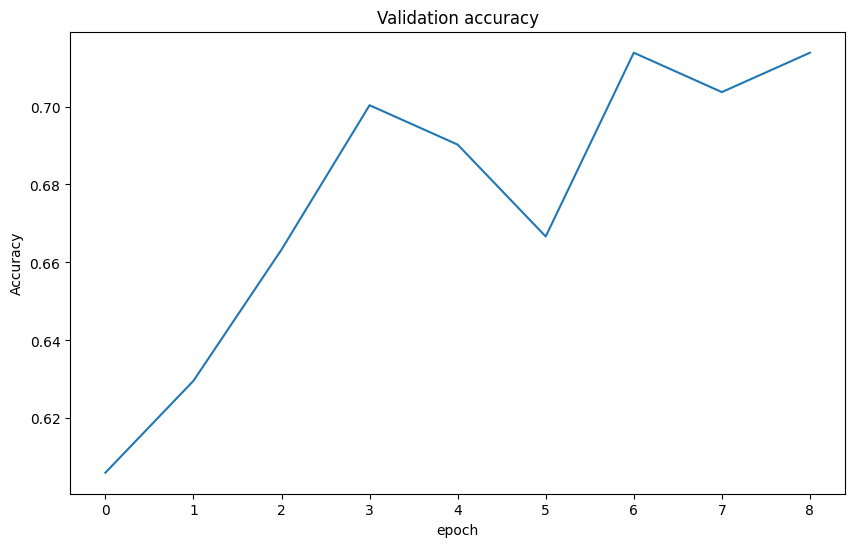

In [12]:
# val_acc
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=best_metrics_df["val_acc"])

plt.xticks(epochs)
plt.title("Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.show()

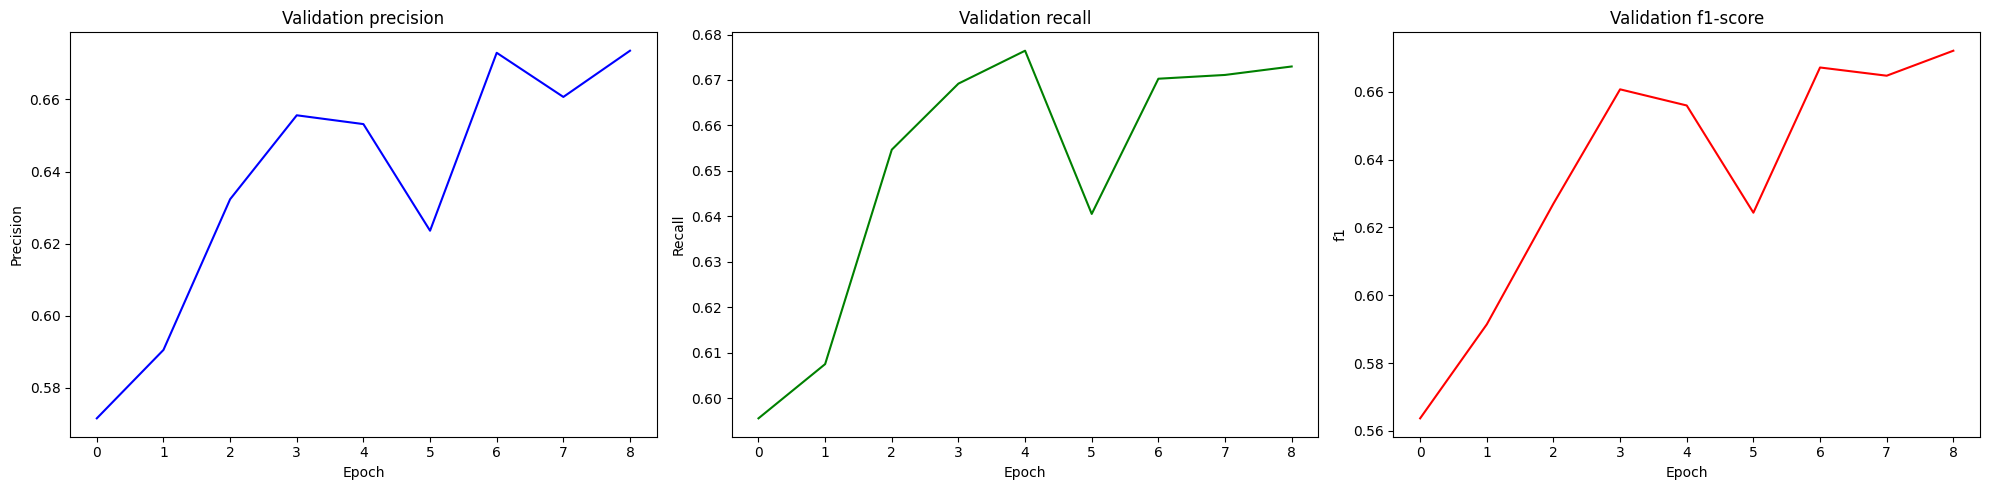

In [13]:
# val_precision	val_recall	val_f1 visualisation
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.lineplot(ax=axes[0], x=epochs, y=best_metrics_df["val_precision"], color="blue")
axes[0].set_title("Validation precision")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Precision")

sns.lineplot(ax=axes[1], x=epochs, y=best_metrics_df["val_recall"], color="green")
axes[1].set_title("Validation recall")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Recall")

sns.lineplot(ax=axes[2], x=epochs, y=best_metrics_df["val_f1"], color="red")
axes[2].set_title("Validation f1-score")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("f1")

plt.tight_layout()
plt.show()

In [14]:
sys.path.append(os.path.abspath(".."))
from models.transfer_models import TransferEfficientNetb0

DS_DIR = "../data"
dataset = datasets.ImageFolder(DS_DIR)
classes = dataset.classes

CHECKPOINT_PATH="../checkpoints/checkpoint_efficientnetb0_best.pth"
checkpoint = torch.load(CHECKPOINT_PATH, map_location="cuda")
model = TransferEfficientNetb0(len(classes))
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

TransferEfficientNetb0(
  (_backbone): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
         

In [16]:
from training.data_processor import DataProcessor
from training.config import (
    BATCH_SIZE, MANUAL_SEED, IMAGE_SIZE, TRAIN_VAL_TEST_SPLIT
)

processor = DataProcessor(
    data_path="../data",
    image_size=IMAGE_SIZE,
    train_val_test_split=(TRAIN_VAL_TEST_SPLIT),
    manual_seed=MANUAL_SEED
)
_, _, ds = processor.process(
    batch_size=BATCH_SIZE,
    augmentation_level=0,
)
data_loader = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=3)

In [17]:
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in data_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)

        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_probs = np.concatenate(all_probs, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

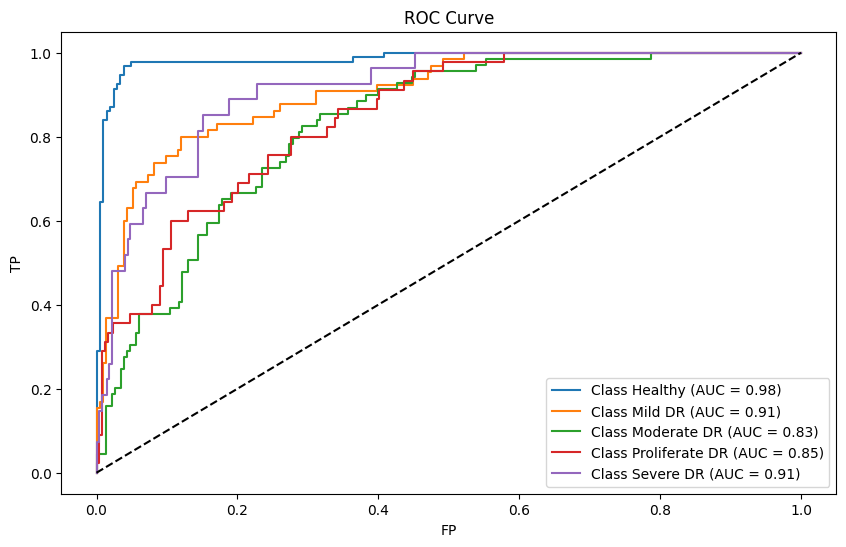

In [19]:
# ROC Curve
plt.figure(figsize=(10, 6))
for i, label in enumerate(classes):
    fpr, tpr, _ = roc_curve((all_labels == i).astype(int), all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC Curve')
plt.legend()
plt.show()

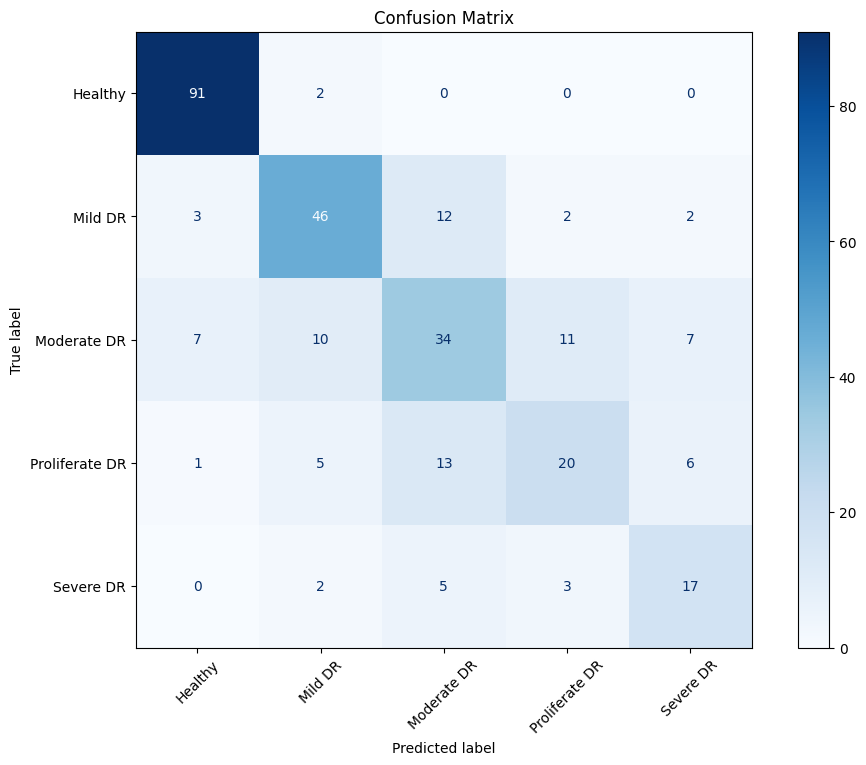

In [20]:
preds = np.argmax(all_probs, axis=1)
conf_matrx = confusion_matrix(all_labels, preds)

fig, ax = plt.subplots(figsize=(12, 8))
disp = ConfusionMatrixDisplay(conf_matrx, display_labels=classes)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()